# Import libraries

In [8]:
# importing libraries to use in modeling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV
import statsmodels.api as sm


# in case we need to further explore, ensure pandas will display all rows and colums
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## Import the cleaned csv datasets that were output from the EDA workbook

In [9]:
# bring in cleaned dataset as a DataFrame
ames_train = pd.read_csv('./datasets/train_clean.csv')
ames_test = pd.read_csv('./datasets/test_clean.csv')

# Check df shapes to make sure we have correct columns and rows

In [10]:
ames_train.shape

(2051, 119)

In [11]:
ames_test.shape

(878, 120)

-----

## This section is left over from original EDA and I didn't move it to EDA notebook as it is no longer being used and was not used

### House Style needs to be split into numberical dummy values. this will allow us to Look at the value of the size of the house in terms of stories. 

#categorial columns
ms_zoning           object
street              object
lot_shape           object
land_contour        object
lot_config          object
land_slope          object
neighborhood        object
condition_1         object
condition_2         object
bldg_type           object
house_style         object
roof_style          object
roof_matl           object
exterior_1st        object
exterior_2nd        object
mas_vnr_type        object
mas_vnr_area        object
exter_qual          object
exter_cond          object
foundation          object
bsmt_qual           object
bsmt_cond           object
bsmt_exposure       object
bsmtfin_type_1      object
bsmtfin_type_2      object
heating             object
heating_qc          object
central_air         object
electrical          object
kitchen_qual        object
functional          object
fireplace_qu        object
garage_type         object
garage_finish       object
garage_qual         object
garage_cond         object
paved_drive         object
fence               object
misc_feature        object
sale_type           object


Space:
gr_liv_area is the total square footage of livable space in the house. 


In [12]:
ames_num = ames_train.select_dtypes(include=['float64','int64'])

----

## Finding Outliers

## I realize that this should be part of EDA, however after discovering the effect these outliers have on the model, I then decided to go in and consider removing them, which is why this is here on this sheet. 

### There are two homes in the initial model that were predicting $600K when the houses were sold for $200K. 

These two homes are the largest square footage homes, but they are both in Edwards Neighborhood which has a mean sale price of $130K. There are most likely Data Input errors on either the square footage, or the sale price. Being that it is only 2 properties and the errors are unknown, I have chosen to remove these two rows from the modeling data. 

In [13]:
ames_train['tot_sq_ft'].sort_values(ascending=False).head()

960     13170.0
1885    11344.0
328      6974.0
1227     6500.0
1897     6344.0
Name: tot_sq_ft, dtype: float64

In [14]:
# exploring outliers based on total square footage 
ames_train.loc[[960,1885,328,1227],:]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,land_contour,lot_config,land_slope,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,shape_ir2,shape_ir3,shape_reg,tot_baths,tot_sq_ft,sale_cod,sale_cwd,sale_con,sale_conld,sale_conli,sale_conlw,sale_new,sale_oth,sale_wd_,log_sqft,sqft_qual,neighborhood_blueste,neighborhood_brdale,neighborhood_brkside,neighborhood_clearcr,neighborhood_collgcr,neighborhood_crawfor,neighborhood_edwards,neighborhood_gilbert,neighborhood_greens,neighborhood_grnhill,neighborhood_idotrr,neighborhood_landmrk,neighborhood_meadowv,neighborhood_mitchel,neighborhood_names,neighborhood_npkvill,neighborhood_nwames,neighborhood_noridge,neighborhood_nridght,neighborhood_oldtown,neighborhood_swisu,neighborhood_sawyer,neighborhood_sawyerw,neighborhood_somerst,neighborhood_stonebr,neighborhood_timber,neighborhood_veenker
960,1499,908154235,60,RL,313.0000,63887,Pave,Bnk,Corner,Gtl,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,1950,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,unkwn,unkwn,0,1,2008,New,160000,0,1,0,5.0,13170.0,0,0,0,0,0,0,1,0,0,9.485697,131700.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1885,2181,908154195,20,RL,128.0000,39290,Pave,Bnk,Inside,Gtl,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,1950,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,unkwn,Elev,17000,10,2007,New,183850,0,0,0,5.0,11344.0,0,0,0,0,0,0,1,0,0,9.336444,113440.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
328,1773,528366050,20,RL,69.0552,12692,Pave,Lvl,Inside,Gtl,Norm,Norm,1Fam,1Story,8,5,1992,1993,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1231.0,Unf,0.0,1969.0,3200.0,GasA,Ex,Y,SBrkr,3228,0,0,3228,1.0,0.0,3,0,4,1,Gd,10,Typ,1,Gd,Attchd,1950,RFn,2.0,546.0,TA,TA,Y,264,75,291,0,0,0,unkwn,unkwn,0,5,2007,WD,430000,0,0,0,4.0,6974.0,0,0,0,0,0,0,0,0,1,8.849944,55792.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1227,47,528176010,20,RL,110.0000,14300,Pave,HLS,Inside,Mod,Norm,Norm,1Fam,1Story,9,5,2003,2004,Hip,CompShg,VinylSd,VinylSd,BrkFace,1095.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1373.0,Unf,0.0,1473.0,2846.0,GasA,Ex,Y,SBrkr,2696,0,0,2696,1.0,0.0,2,1,3,1,Ex,10,Typ,2,Gd,Attchd,1950,Fin,3.0,958.0,TA,TA,Y,220,150,0,0,0,0,unkwn,unkwn,0,6,2010,WD,500000,0,0,1,4.0,6500.0,0,0,0,0,0,0,0,0,1,8.779557,58500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [15]:
ames_train['exterior_1st'].value_counts()

VinylSd    724
MetalSd    331
HdBoard    300
Wd Sdng    276
Plywood    152
CemntBd     90
BrkFace     64
WdShing     45
AsbShng     33
Stucco      27
BrkComm      3
CBlock       2
Stone        2
AsphShn      1
ImStucc      1
Name: exterior_1st, dtype: int64

In [16]:
# sort houses by total square footage to find the largest houses and find the outliers
ames_train.sort_values(by='tot_sq_ft',ascending=False).head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,land_contour,lot_config,land_slope,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,shape_ir2,shape_ir3,shape_reg,tot_baths,tot_sq_ft,sale_cod,sale_cwd,sale_con,sale_conld,sale_conli,sale_conlw,sale_new,sale_oth,sale_wd_,log_sqft,sqft_qual,neighborhood_blueste,neighborhood_brdale,neighborhood_brkside,neighborhood_clearcr,neighborhood_collgcr,neighborhood_crawfor,neighborhood_edwards,neighborhood_gilbert,neighborhood_greens,neighborhood_grnhill,neighborhood_idotrr,neighborhood_landmrk,neighborhood_meadowv,neighborhood_mitchel,neighborhood_names,neighborhood_npkvill,neighborhood_nwames,neighborhood_noridge,neighborhood_nridght,neighborhood_oldtown,neighborhood_swisu,neighborhood_sawyer,neighborhood_sawyerw,neighborhood_somerst,neighborhood_stonebr,neighborhood_timber,neighborhood_veenker
960,1499,908154235,60,RL,313.0000,63887,Pave,Bnk,Corner,Gtl,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,1950,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,unkwn,unkwn,0,1,2008,New,160000,0,1,0,5.0,13170.0,0,0,0,0,0,0,1,0,0,9.485697,131700.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1885,2181,908154195,20,RL,128.0000,39290,Pave,Bnk,Inside,Gtl,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,1950,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,unkwn,Elev,17000,10,2007,New,183850,0,0,0,5.0,11344.0,0,0,0,0,0,0,1,0,0,9.336444,113440.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
328,1773,528366050,20,RL,69.0552,12692,Pave,Lvl,Inside,Gtl,Norm,Norm,1Fam,1Story,8,5,1992,1993,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1231.0,Unf,0.0,1969.0,3200.0,GasA,Ex,Y,SBrkr,3228,0,0,3228,1.0,0.0,3,0,4,1,Gd,10,Typ,1,Gd,Attchd,1950,RFn,2.0,546.0,TA,TA,Y,264,75,291,0,0,0,unkwn,unkwn,0,5,2007,WD,430000,0,0,0,4.0,6974.0,0,0,0,0,0,0,0,0,1,8.849944,55792.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1227,47,528176010,20,RL,110.0000,14300,Pave,HLS,Inside,Mod,Norm,Norm,1Fam,1Story,9,5,2003,2004,Hip,CompShg,VinylSd,VinylSd,BrkFace,1095.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1373.0,Unf,0.0,1473.0,2846.0,GasA,Ex,Y,SBrkr,2696,0,0,2696,1.0,0.0,2,1,3,1,Ex,10,Typ,2,Gd,Attchd,1950,Fin,3.0,958.0,TA,TA,Y,220,150,0,0,0,0,unkwn,unkwn,0,6,2010,WD,500000,0,0,1,4.0,6500.0,0,0,0,0,0,0,0,0,1,8.779557,58500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1897,2738,905427030,75,RL,60.0000,19800,Pave,Lvl,Inside,Gtl,Norm,Norm,1Fam,2.5Unf,6,8,1935,1990,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Rec,425.0,Unf,0.0,1411.0,1836.0,GasA,Gd,Y,SBrkr,1836,1836,0,3672,0.0,0.0,3,1,5,1,Gd,7,Typ,2,Gd,Detchd,1950,Unf,2.0,836.0,TA,TA,Y,684,80,32,0,0,0,unkwn,unkwn,0,12,2006,WD,415000,0,0,1,4.0,6344.0,0,0,0,0,0,0,0,0,1,8.755265,38064.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### There does not seem to be any influence to have on these outlier homes. They are the largest homes in the set, and there is most likely a data input error, potentially a missing zero on the sale price, but they are not incluencing the model enough to spend more time on

In [17]:
# USE THIS CELL TO DROP THE OUTLIERS

ames_train.drop([960, 1885],inplace=True)
ames_train.shape
# ames.at[960,'saleprice'] = 1600000
# ames.at[1885,'saleprice'] = 1838500

(2049, 119)

## DEFINE FEATURES

In [18]:
# print datatypes to show categorical vs numerial columns

# .head() here now to save you scroll time
ames_train.dtypes.head()

id                int64
pid               int64
ms_subclass       int64
ms_zoning        object
lot_frontage    float64
dtype: object

In [19]:
features = [
# numerical columns first    
# 'ms_subclass'
# ,'lot_frontage'       
# ,'lot_area'             
# ,'overall_qual'         
# ,'overall_cond'         
# ,'year_built'           
# ,'year_remod/add'       
# ,'bsmtfin_sf_1'       
# ,'bsmtfin_sf_2'       
# ,'bsmt_unf_sf'        
# ,'total_bsmt_sf'      
# ,'1st_flr_sf'           
# ,'2nd_flr_sf'           
# ,'low_qual_fin_sf'      
# ,'gr_liv_area'          
# ,'bsmt_full_bath'     
# ,'bsmt_half_bath'     
# ,'full_bath'            
# ,'half_bath'            
# ,'bedroom_abvgr'        
# ,'kitchen_abvgr'        
'totrms_abvgrd'
# ,'fireplaces'
# ,'garage_yr_blt'        
# ,'garage_cars'        
# ,'garage_area'        
# ,'wood_deck_sf'         
# ,'open_porch_sf'        
# ,'enclosed_porch'       
# ,'3ssn_porch'           
# ,'screen_porch'         
# ,'pool_area'            
# ,'misc_val'             
# ,'mo_sold'              
# ,'yr_sold'              
# ,'shape_IR2'            
# ,'shape_IR3'            
# ,'shape_Reg'            
,'tot_baths'          
,'tot_sq_ft'          
# ,'style_1.5fin'        
# ,'style_1.5unf'         
# ,'style_1story'         
# ,'style_2.5fin'         
# ,'style_2.5unf'         
# ,'style_2story'         
# ,'style_sfoyer'         
# ,'style_slvl'           
# ,'edwards'
,'sqft_qual'
,'sale_wd_'
,'sale_new'
# ,'neighborhood_Blueste'
# ,'neighborhood_BrDale'
# ,'neighborhood_BrkSide
# ,'neighborhood_ClearCr'      
# ,'neighborhood_CollgCr'      
# ,'neighborhood_Crawfor'      
# ,'neighborhood_Edwards'      
# ,'neighborhood_Gilbert'      
# ,'neighborhood_Greens'      
# ,'neighborhood_GrnHill'      
# ,'neighborhood_IDOTRR'       
# ,'neighborhood_Landmrk'      
# ,'neighborhood_MeadowV'      
# ,'neighborhood_Mitchel'      
# ,'neighborhood_NAmes'        
# ,'neighborhood_NPkVill'      
# ,'neighborhood_NWAmes'       
# ,'neighborhood_NoRidge'      
# ,'neighborhood_NridgHt'      
# ,'neighborhood_OldTown'      
# ,'neighborhood_SWISU'        
# ,'neighborhood_Sawyer'       
# ,'neighborhood_SawyerW'      
# ,'neighborhood_Somerst'      
# ,'neighborhood_StoneBr'      
# ,'neighborhood_Timber'       
# ,'neighborhood_Veenker'      
#             , 'ms_zoning'
#             , 'street'
#             , 'lot_shape'
#             , 'land_contour'
#             , 'lot_config'
#             , 'land_slope'
#             , 'neighborhood'
#             , 'condition_1'
#             , 'condition_2'
#             , 'bldg_type'
#             , 'house_style'
#             , 'overall_qual'
#             , 'overall_cond'
#             , 'year_built'
#             , 'year_remod/add'
#             , 'roof_style'
#             , 'roof_matl'
#             , 'exterior_1st'
#             , 'exterior_2nd'
#             , 'mas_vnr_type'
#             , 'mas_vnr_area'
#             , 'exter_qual'
#             , 'exter_cond'
#             , 'foundation'
#             , 'bsmt_qual'
#             , 'bsmt_cond'
#             , 'bsmt_exposure'
#             , 'bsmtfin_type_1'
#             , 'bsmtfin_sf_1'
#             , 'bsmtfin_type_2'
#             , 'bsmtfin_sf_2'
#             , 'bsmt_unf_sf'
#             , 'total_bsmt_sf'
#             , 'heating'
#             , 'heating_qc'
#             , 'central_air'
#             , 'electrical'
#             , '1st_flr_sf'
#             , '2nd_flr_sf'
#             , 'low_qual_fin_sf'
#             , 'gr_liv_area'
#             , 'bsmt_full_bath'
#             , 'bsmt_half_bath'
#             , 'full_bath'
#             , 'half_bath'
#             , 'bedroom_abvgr'
#             , 'kitchen_abvgr'
#             , 'kitchen_qual'
#             , 'totrms_abvgrd'
#             , 'functional'
#             , 'fireplaces'
#             , 'fireplace_qu'
#             , 'garage_type'
#             , 'garage_yr_blt'
#             , 'garage_finish'
#             , 'garage_cars'
#             , 'garage_area'
#             , 'garage_qual'
#             , 'garage_cond'
#             , 'paved_drive'
#             , 'wood_deck_sf'
#             , 'open_porch_sf'
#             , 'enclosed_porch'
#             , '3ssn_porch'
#             , 'screen_porch'
#             , 'pool_area'
#             , 'fence'
]

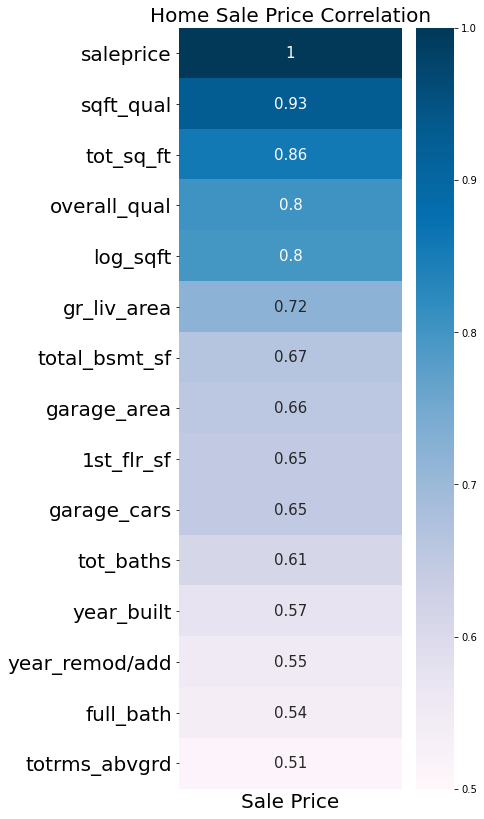

In [20]:
plt.figure(figsize=(5,14))
sns.heatmap(ames_train.corr()[['saleprice']].sort_values('saleprice',ascending=False).head(15),
           annot=True,
            cmap='PuBu',
            annot_kws={'fontsize':15},
            vmin=.5,
            vmax=1
           )
plt.title('Home Sale Price Correlation',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(ticks=[])
plt.xlabel('Sale Price',fontsize=20);

-----

# This is remnant code from original pass that I did not end up using

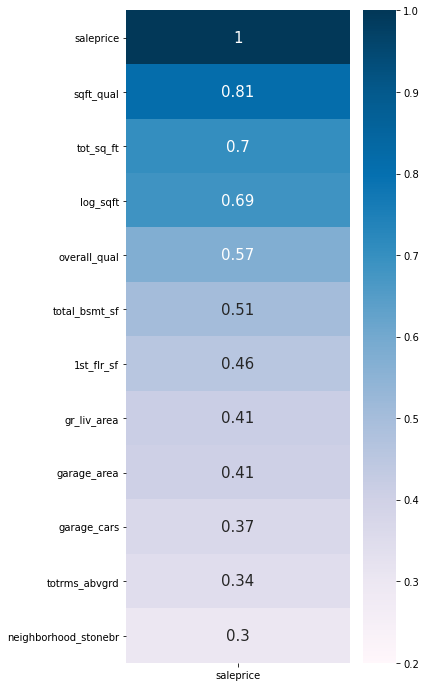

In [21]:
# Breadcrumb
# figure out a way to find correlation on saleprice to homes worth more than $250K
# didn't end up using this
ames_high = ames_train.loc[ames_train['saleprice'] >= 250000]

plt.figure(figsize=(5,12))
sns.heatmap(ames_high.corr()[['saleprice']].sort_values('saleprice',ascending=False).head(12),
           annot=True,
            cmap='PuBu',
            annot_kws={'fontsize':15},
            vmax=1,
            vmin=.2
           );

In [22]:
# features_54 = ['tot_baths','garage_cars','totrms_abvgrd']
# features_50 = ['lot_area','lot_frontage','tot_sq_ft']
# features = ['total_bsmt_sf','gr_liv_area','overall_qual','garage_cars','bedroom_abvgr','tot_sq_ft'] # 44K
# features = ['total_bsmt_sf','gr_liv_area','overall_qual','tot_sq_ft','wood_deck_sf','full_bath'
#             ,'totrms_abvgrd','shape_Reg','fireplaces'] 
# features = ['overall_qual','gr_liv_area','tot_baths']

# features = ['overall_qual','year_remod/add']
# features = ['tot_sq_ft']

In [23]:
# # features =  ['pid', 'lot_area', 'overall_qual', 'overall_cond', 'year_built',
#        'year_remod/add', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf',
#        'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
#        'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
#        'half_bath', 'bedroom_abvgr', 'totrms_abvgrd',
#        'fireplaces', 'garage_cars', 'garage_area',
#        'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch',
#        'screen_porch', 'pool_area', 'mo_sold', 'yr_sold',
#        'saleprice'] # list of features

----------------

--------

# **MODELING**

## This code went through a number of evolutions. Eventually I settled on a mega function to push out various models all at one go so I could use the train and test csv at the same time without hvaing to edit and run again

In [24]:
ames_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,land_contour,lot_config,land_slope,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,shape_ir2,shape_ir3,shape_reg,tot_baths,tot_sq_ft,sale_cod,sale_cwd,sale_con,sale_conld,sale_conli,sale_conlw,sale_new,sale_oth,sale_wd_,log_sqft,sqft_qual,neighborhood_blueste,neighborhood_brdale,neighborhood_brkside,neighborhood_clearcr,neighborhood_collgcr,neighborhood_crawfor,neighborhood_edwards,neighborhood_gilbert,neighborhood_greens,neighborhood_grnhill,neighborhood_idotrr,neighborhood_landmrk,neighborhood_meadowv,neighborhood_mitchel,neighborhood_names,neighborhood_npkvill,neighborhood_nwames,neighborhood_noridge,neighborhood_nridght,neighborhood_oldtown,neighborhood_swisu,neighborhood_sawyer,neighborhood_sawyerw,neighborhood_somerst,neighborhood_stonebr,neighborhood_timber,neighborhood_veenker
0,109,533352170,60,RL,69.0552,13517,Pave,Lvl,CulDSac,Gtl,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,unkwn,Attchd,1950,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,unkwn,unkwn,0,3,2010,WD,130500,0,0,0,3.0,2679.0,0,0,0,0,0,0,0,0,1,7.893199,16074.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,544,531379050,60,RL,43.0000,11492,Pave,Lvl,CulDSac,Gtl,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1950,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,unkwn,unkwn,0,4,2009,WD,220000,0,0,0,4.0,3594.0,0,0,0,0,0,0,0,0,1,8.187021,25158.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,153,535304180,20,RL,68.0000,7922,Pave,Lvl,Inside,Gtl,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,unkwn,Detchd,1950,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,unkwn,unkwn,0,1,2010,WD,109000,0,0,1,2.0,2360.0,0,0,0,0,0,0,0,0,1,7.766417,11800.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,318,916386060,60,RL,73.0000,9802,Pave,Lvl,Inside,Gtl,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,unkwn,BuiltIn,1950,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,unkwn,unkwn,0,4,2010,WD,174000,0,0,1,3.0,2228.0,0,0,0,0,0,0,0,0,1,7.708860,11140.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,255,906425045,50,RL,82.0000,14235,Pave,Lvl,Inside,Gtl,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,unkwn,Detchd,1950,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,unkwn,unkwn,0,3,2010,WD,138500,0,0,0,2.0,2605.0,0,0,0,0,0,0,0,0,1,7.865188,15630.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [25]:
# Establishing X as feature list, y as saleprice, and X_2 as value for feature list in the test.csv

X = ames_train[features]
y = ames_train['saleprice']

X_2 = ames_test[features]

## This is the modeling function which will output the results of the models, as well as allow for us to pull out specific y values to run for kaggle competition submissions

In [26]:
# X does not need to be edited. It is the feature set from above applied to the ames_train dataframe
# y does not need to be edited. It is the dependent variable 'saleprice' from the ames_train dataframe
# y_value is asking for string of 'train' 'pred' or 'test' to have the function return those arrays of the specific model
# X_2 does not need to be edited. It is the feature set from above appled to the ames_test dataframe
# pp is asking for 'linear', 'ridge' or 'lasso' as a string to be used in conjuction with the output for y_value


def ames_model(X,y,y_value,X_2,pp):
    
    #Split train and test data
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.1,random_state=42)
  
    # Standard Scaler to X_Training data
    scaler = StandardScaler().fit(X_train)
    X_train_sc = scaler.transform(X_train)
    X_test_sc = scaler.transform(X_test)

    #instantiate LinearRegression Model
    linreg = LinearRegression()
 
    linreg.fit(X_train_sc,y_train)

    ols = sm.OLS(y,X).fit().summary()
    
    ridge = Ridge()
    # Fit.
    ridge.fit(X_train_sc,y_train)
    
    # Cross-validate over our list of Lasso alphas.
    lasso_cv = LassoCV(cv=5)

    # Fit model using best ridge alpha!
    lasso_cv.fit(X_train_sc,y_train)
    
    y_pred = linreg.predict(X_train_sc)
    test_pred = linreg.predict(X_test_sc)
    ridge_pred = ridge.predict(scaler.transform(X_test_sc))
    
    # predicting new values with the 3 models
    lin_predict = linreg.predict(scaler.transform(X_2))
    ridge_predict = ridge.predict(scaler.transform(X_2))
    lasso_predict = lasso_cv.predict((X_2))
   
    if y_value == 'pred':
        return y_pred
    else:
        pass
    if y_value == 'train':
        return y_train
    else:
        pass
    if y_value == 'test':
        return y_test
    else:
        pass
    if pp == 'linear':
        return lin_predict
    elif pp == 'ridge':
        return ridge_predict
    elif pp == 'lasso':
        return lasso_predict
    else: 
        pass
 
    print(f'The R Squared Score is {metrics.r2_score(y_train,y_pred)}')
    print(f'The cross validation score for X_train is {cross_val_score(linreg,X_train_sc,y_train,cv=5).mean()}')
    print(f'The cross validation score X_test is {cross_val_score(linreg,X_test_sc,y_test,cv=5).mean()}')    
    print(f'The Root Mean Squared Error for X_train is {np.sqrt(metrics.mean_squared_error(y_train,y_pred))}')
    print(f'The Root Mean Squared Error X_test is {np.sqrt(metrics.mean_squared_error(y_test,test_pred))}')
    print(f'The ridge train score is {ridge.score(X_train_sc,y_train)}')
    print(f'The ridge test score is {ridge.score(X_test_sc,y_test)}')
    print(f'The lasso_cv train score is {lasso_cv.score(X_train, y_train)}')
    print(f'The lasso_cv test score is {lasso_cv.score(X_test_sc,y_test)}')
    print(ols)

In [27]:
ames_model(X,y,0,X_2,0)

The R Squared Score is 0.8740259726091534
The cross validation score for X_train is 0.8710031746008753
The cross validation score X_test is 0.8655164229595848
The Root Mean Squared Error for X_train is 28270.596666354882
The Root Mean Squared Error X_test is 26840.95060098571
The ridge train score is 0.8740237088027598
The ridge test score is 0.8742489557954948
The lasso_cv train score is -367182321.5784582
The lasso_cv test score is 0.8743988241184991
                                 OLS Regression Results                                
Dep. Variable:              saleprice   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                          1.620e+04
Date:                Sat, 16 May 2020   Prob (F-statistic):                        0.00
Time:                        14:14:35   Log-Likelihood:                         -23919.
No. Observation

----

In [28]:
## The following visualizations are using outputs from the model for plotting. 

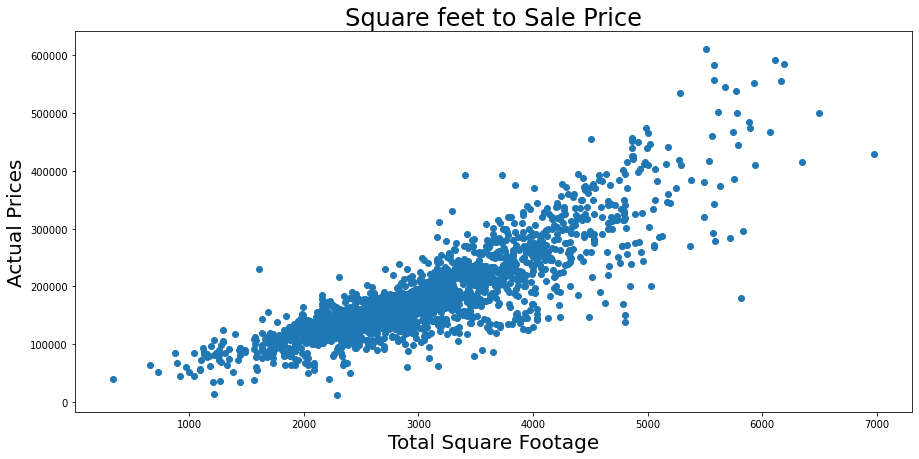

In [29]:
# Plot for just taking the total square footage
plt.figure(figsize=(15,7))

# Generate a scatterplot of our data.
# plt.scatter(y_pred,
#             y_train,
#             c='blue')

# Also generate a line for our prediction.

# plt.plot(
#     [0, ames_model(X,y,'pred',X_2,0).max()]
#          ,[0,ames_model(X,y,'train',X_2,0).max()]
#         ,color='red')

plt.scatter(x=ames_train[['tot_sq_ft']],
           y=y)

# Add line of best fit
# sns.regplot(ames_model(ames_train[['tot_sq_ft']],y,'pred',ames_test[['tot_sq_ft']],0)
#             ,ames_model(ames_train[['tot_sq_ft']],y,'train',ames_test[['tot_sq_ft']],0)
#            ,color = 'blue')

plt.ylabel('Actual Prices',fontsize = 20)
plt.xlabel('Total Square Footage',fontsize = 20)
plt.title('Square feet to Sale Price', fontsize = 24);

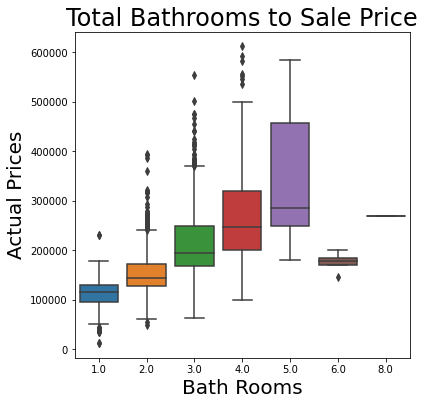

In [30]:
# Plot for just taking the total square footage
plt.figure(figsize=(6,6))



sns.boxplot(x=ames_train['tot_baths'],
           y=y)

plt.ylabel('Actual Prices',fontsize = 20)
plt.xlabel('Bath Rooms',fontsize = 20)
plt.title('Total Bathrooms to Sale Price', fontsize = 24);

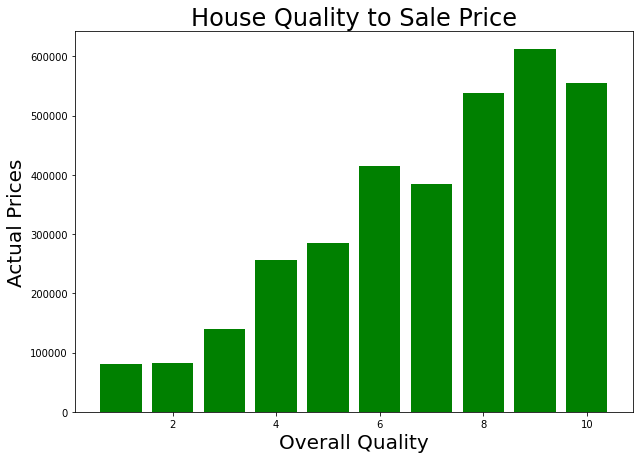

In [31]:
# Plot for just taking the total square footage
plt.figure(figsize=(10,7))

plt.bar(ames_train['overall_qual'],
        height=ames_train['saleprice']
       ,color='green'
       )


# plt.scatter(x=ames_train[['tot_sq_ft']],
#            y=y)


plt.ylabel('Actual Prices',fontsize = 20)
plt.xlabel('Overall Quality',fontsize = 20)
plt.title('House Quality to Sale Price', fontsize = 24);

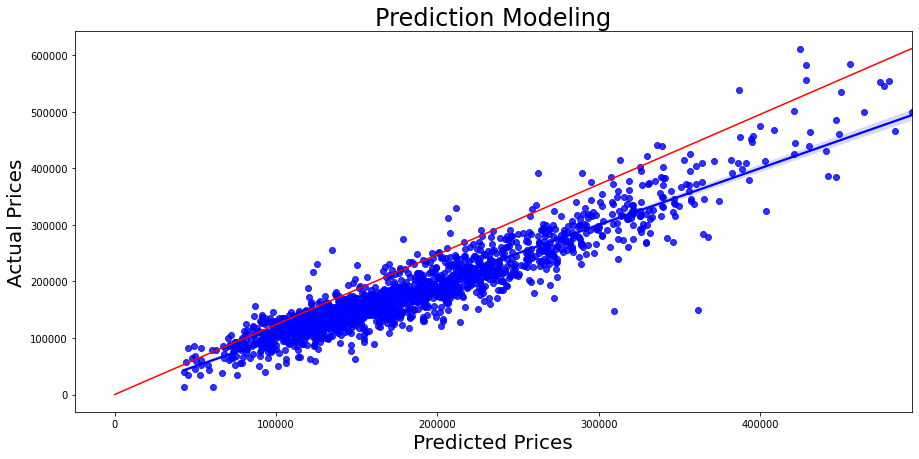

In [32]:
# Create a figure.
plt.figure(figsize=(15,7))

# Generate a scatterplot of our data.
# plt.scatter(y_pred,
#             y_train,
#             c='blue')

# Also generate a line for our prediction.

plt.plot(
    [0, ames_model(X,y,'pred',X_2,0).max()]
         ,[0,ames_model(X,y,'train',X_2,0).max()]
        ,color='red')

# Add line of best fit
sns.regplot(ames_model(X,y,'pred',X_2,0)
            ,ames_model(X,y,'train',X_2,0)
           ,color = 'blue')

plt.ylabel('Actual Prices',fontsize = 20)
plt.xlabel('Predicted Prices',fontsize = 20)
plt.title('Prediction Modeling', fontsize = 24);

# Model the Test Data for Kaggle Submission

In [33]:
submit = pd.DataFrame(list(zip(ames_test['id'],ames_model(X,y,'',X_2,'ridge'))),columns=['id','saleprice'])

In [34]:
submit.to_csv('./datasets/submission_8.csv',index=False)

# Separately run Log Model

If time, run through a log model. 

In [35]:
# Unforutantely I was never able to get to the log to figure it out. 

In [36]:
# log_features = ['log_sqft']
# X_log = ames_train[log_features]
# y = ames_train['saleprice']

# X_log_tr, X_lot_te, y_log_tr, y_log_te = train_test_split(X_log,y,test_size=.1,random_state=42)

In [37]:
# lr_log = LinearRegression().fit()

In [1]:
import dg_scripts.linridgelasso as lrl

ModuleNotFoundError: No module named 'dg_scripts'